# Support Vector Regression

## Importing Libraries

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


### Creating Synthetic Dataset.

In [60]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=2,n_targets=1, noise=15.0)

#### Visualizing using seaborn

<AxesSubplot: xlabel='0', ylabel='1'>

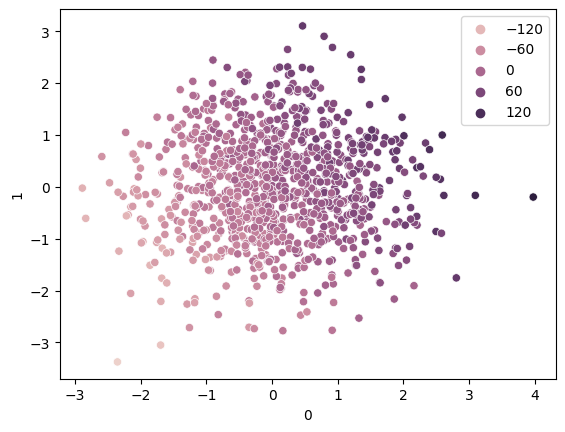

In [61]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

## Splitting into training and test dataset

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Training the model.

In [63]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

### Checking the Accuracy

In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test) * 100)

87.17892345442885


## Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01,0.1,1,10,100],
    'kernel': ['linear'],
    'epsilon': [0.1, 0.2,0.3]    
}



In [66]:
grid = GridSearchCV(svr, param_grid=parameters, cv = 5,verbose=3)

In [67]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.01, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.178 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.177 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.146 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.158 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.175 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.178 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.177 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.146 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.158 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.175 total time=   0.0s
[CV 1/5] END 

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             verbose=3)

In [68]:
grid.best_params_

{'C': 1, 'epsilon': 0.2, 'gamma': 0.01, 'kernel': 'linear'}

### Retraining the model

In [69]:
svr = SVR(C=1,epsilon=0.2,gamma=0.01,kernel='linear')

In [70]:
svr.fit(X_train,y_train)

SVR(C=1, epsilon=0.2, gamma=0.01, kernel='linear')

In [71]:
y_pred = svr.predict(X_test)

In [72]:
print(r2_score(y_pred,y_test) * 100)

87.18077831795964


# END